In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# 1.Đọc dữ liệu 


In [51]:
vni = pd.read_csv('VN Index Historical Data.xlsx - VN Index Historical Data.csv')
vni.head(5)

,Date,Price
0,7/31/2022,1252.74
1,8/7/2022,1262.33
2,8/14/2022,1269.18
3,8/21/2022,1282.57
4,8/28/2022,1280.51


# B1: Xác định các tham số p,d,q
- Xác định d: sử dụng kiểm định ADF
- Xác định p,d: Sử dụng PACF,ACF để tìm p,d

In [52]:
# Set index to  Date 
vni['Date'] = pd.to_datetime(vni['Date'])
vni = vni.set_index('Date')


## Tách trend và mùa


In [53]:
result = seasonal_decompose(vni['Price'], model = 'addictive', period = 1)

## Vẽ biểu đồ 


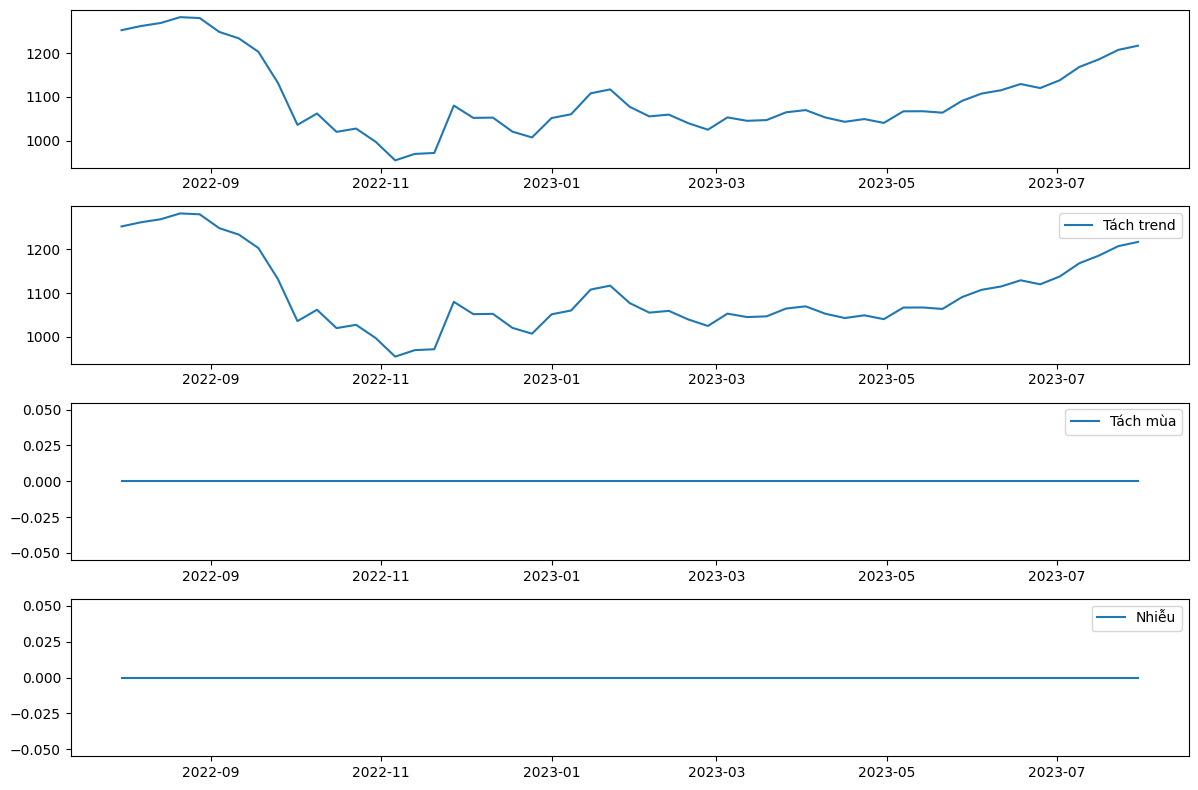

In [54]:
plt.figure(figsize = (12,8))
plt.subplot(4,1,1)

# Biểu đồ giá VNI
plt.plot(vni['Price'],label = 'Biểu đồ điểm VNI index')

# Tách trend
plt.subplot(4,1,2)
plt.plot(result.trend, label = 'Tách trend')
plt.legend()

# Tách mùa 
plt.subplot(4,1,3)
plt.plot(result.seasonal, label = 'Tách mùa')
plt.legend()

# Tách nhiễu
plt.subplot(4,1,4)
plt.plot(result.resid, label = 'Nhiễu')
plt.legend()

plt.tight_layout()
plt.show()


## Nhận xét: 
- Tính mùa không rõ ràng -> không có thông tin về mùa 
- Không có tính chu kỳ do dữ liệu chưa có tới 1 năm 


## Kiểm định ADF cho dữ liệu 


In [55]:
from  statsmodels.tsa.stattools import adfuller 

# Thực hiện kiểm định cho mô hình trên 
# di
adf1 = adfuller(vni['Price'], regression = 'c',maxlag = 8)
    # regressin là các tính chất của chuỗi như: trend là t, n là none, c là trung bình
    # max lag = lag dài nhất 
print(f"ADF Stat: {adf1[0]}")
print(f"P-value {adf1[1]}")

ADF Stat: -1.7611982045525367
P-value 0.3998886471966358


# Nhận xét
- P-value: chuỗi đã cho là không DỪNG
- Giải thích: 
    + H0 : là giả thiết không dừng P-value lớn hơn mức ý nghĩa là 0.05
    + H1 : là giả thiết DỪNG. P-value nhỏ hơn MỨC Ý NGHĨA

## Lấy sai phân 
- Chú ý: sau khi lấy sai phân thì trung bình sẽ không còn nữa

In [56]:
adf2 = adfuller(np.diff(vni['Price']),regression ='n',maxlag = 8)
print(f"ADF Stat: {adf2[0]}")
print(f"P-value {adf2[1]}")


ADF Stat: -2.452061070404866
P-value 0.013713873347537835


# Nhận xét
- P-value: chuỗi đã cho là  DỪNG
- Giải thích: 
    + H0 : là giả thiết không dừng P-value lớn hơn mức ý nghĩa là 0.05
    + H1 : là giả thiết DỪNG. P-value nhỏ hơn MỨC Ý NGHĨA

# B2: Ước lượng mô hình 

## Vẽ đồ thị PACF, ACF

Đồ thị ACF Figure(640x480)
Đồ thị PACF Figure(640x480)


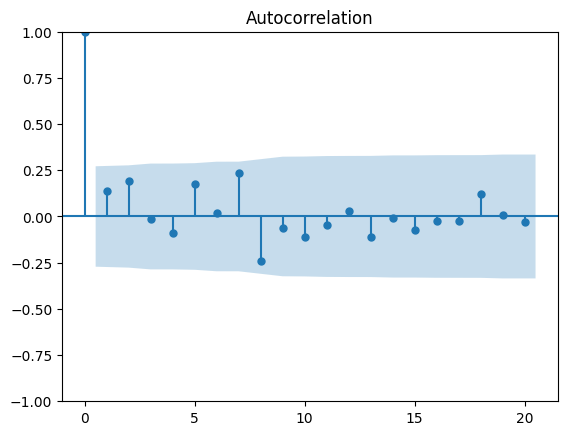

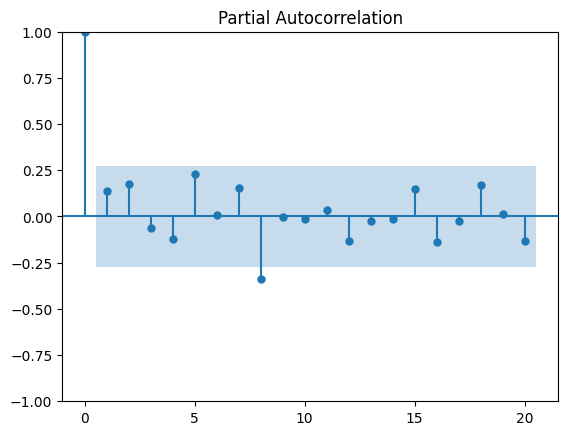

In [57]:
print(f"Đồ thị ACF {plot_acf(np.diff(vni['Price']),lags = 20)}")
print(f"Đồ thị PACF {plot_pacf(np.diff(vni['Price']),lags= 20)}")

# Nhận xét:
- Chọn bậc q: theo đồ thị ACF: 5 và 8 
- Chọn bậc p: theo đồ thị PACF: tất cả nằm bên trong đường màu xanh (7, 8, 0)
- Chọn mô hình: ARIMA(5,1,7), ARIMA(5,1,8), ARIMA(5,1,0), ARIMA(8,1,7), ARIMA(8,1,8), ARIMA(8,1,0) 

## Ước lượng mô hình

### Import thư viện

In [58]:
from statsmodels.tsa.arima.model import ARIMA

import statsmodels.api as sm

### Toàn bộ độ trễ

In [59]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already imported necessary libraries and loaded your data

# Mô hihf 1 

# Fit the ARIMA model
md1 = ARIMA(vni['Price'], order=(5, 1, 0))
result = md1.fit()
print(result.summary())




                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   53
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -248.789
Date:                Sun, 07 Jan 2024   AIC                            509.578
Time:                        14:28:51   BIC                            521.285
Sample:                    07-31-2022   HQIC                           514.066
                         - 07-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1420      0.109      1.297      0.195      -0.073       0.357
ar.L2          0.2092      0.162      1.289      0.198      -0.109       0.527
ar.L3         -0.0890      0.162     -0.551      0.5

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [60]:
# Mô hình 2 
md2 = ARIMA(vni['Price'], order = (5,1,7))
result2 = md2.fit()
print(result2.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   53
Model:                 ARIMA(5, 1, 7)   Log Likelihood                -241.316
Date:                Sun, 07 Jan 2024   AIC                            508.632
Time:                        14:28:51   BIC                            533.998
Sample:                    07-31-2022   HQIC                           518.357
                         - 07-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0760      0.232     -0.328      0.743      -0.531       0.379
ar.L2          0.1355      0.243      0.558      0.577      -0.341       0.612
ar.L3          0.1316      0.256      0.514      0.6

In [61]:
# Mô hình 3
md3 = ARIMA(vni['Price'], order = (5,1,8))
result3 = md3.fit()
print(result3.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   53
Model:                 ARIMA(5, 1, 8)   Log Likelihood                -242.614
Date:                Sun, 07 Jan 2024   AIC                            513.229
Time:                        14:28:52   BIC                            540.546
Sample:                    07-31-2022   HQIC                           523.702
                         - 07-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6505      0.265      2.456      0.014       0.131       1.170
ar.L2         -0.0362      0.254     -0.143      0.887      -0.533       0.461
ar.L3         -0.1629      0.452     -0.360      0.7

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
# Mô hình 4 


md4 = ARIMA(vni['Price'], order = (8,1,7))
result4 = md4.fit()
print(result4.summary())


c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   53
Model:                 ARIMA(8, 1, 7)   Log Likelihood                -239.432
Date:                Sun, 07 Jan 2024   AIC                            510.864
Time:                        14:28:52   BIC                            542.084
Sample:                    07-31-2022   HQIC                           522.833
                         - 07-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0176      0.238      0.074      0.941      -0.450       0.485
ar.L2          0.1793      0.247      0.726      0.468      -0.305       0.664
ar.L3          0.2125      0.225      0.943      0.3

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
# Mô hình 5
md5 = ARIMA(vni['Price'], order = (8,1,8))
result5 = md5.fit()
print(result5.summary())

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   53
Model:                 ARIMA(8, 1, 8)   Log Likelihood                -238.949
Date:                Sun, 07 Jan 2024   AIC                            511.898
Time:                        14:28:53   BIC                            545.069
Sample:                    07-31-2022   HQIC                           524.615
                         - 07-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7858      0.254      3.093      0.002       0.288       1.284
ar.L2          0.2188      0.336      0.651      0.515      -0.440       0.878
ar.L3          0.0606      0.275      0.220      0.8

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
# Mô hình 6 
md6 =  ARIMA(vni['Price'],order  = (8,1,0))
result6 = md6.fit()
print(result6.summary()) 


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   53
Model:                 ARIMA(8, 1, 0)   Log Likelihood                -245.107
Date:                Sun, 07 Jan 2024   AIC                            508.215
Time:                        14:28:53   BIC                            525.776
Sample:                    07-31-2022   HQIC                           514.947
                         - 07-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1988      0.106      1.869      0.062      -0.010       0.407
ar.L2          0.1739      0.173      1.008      0.314      -0.164       0.512
ar.L3          0.0108      0.177      0.061      0.9

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


### Phần 1: Thông tin tổng hợp
- AIC, BIC, HQIC các chỉ số đo lường hiệu quả của mô hình. Thấp là chỉ số tốt
### Phần 2: Thông tin ước lượng
- ar.L1 ... ar.Ln: Các hệ số của thành phần phân phối hồi quy (AR) tương ứng các lag
- sigma2: Phương sai của thành phần ngẫu nhiên không dự đoán. ( Nhiễu )
### Phân 3: Kiểm định: Tương quan, Phương sai thay đổi, Kiểm địng về pp chuẩn
- Ljung-Box (L1) (Q):  Kết quả kiểm định cho phần dư, kiểm tra tính không tương quan cho phần dư. Ở đây không tương quan cho lag = 1
- Jarque-Bera (JB): Kiểm định phân phối cho phần dư (Kiểm định về phân phối chuẩn)

Trong mô hình ARIMA ước lượng hệ số của AR sẽ được tiến hành bằng phương pháp "Hợp lý cực đại (Maximum likelihood)". 
P >|z|: kiểm định giả thuyết bác bỏ giải thuyết H0 rằng trung bình hệ số = 0 ?
Các mô hình có P-value khá to -> Không ảnh hưởng đến biến phụ thuộc (vni['Price'])

### So sánh các chỉ số AIC,BIC,HQ



In [65]:
print("Chỉ số AIC")
print(f"Md1: {result.aic} \n Md2: {result2.aic} \n Md3: {result3.aic} \n Md4: {result4.aic} \n Md5: {result5.aic} \n Md6: {result6.aic}\n")
print("Chỉ số BIC")
print(f"Md1: {result.bic} \n Md2: {result2.bic} \n Md3: {result3.bic} \n Md4: {result4.bic} \n Md5: {result5.bic} \n Md6: {result6.bic}\n")
print("Chỉ số HQ")
print(f"Md1: {result.hqic} \n Md2: {result2.hqic} \n Md3: {result3.hqic} \n Md4: {result4.hqic} \n Md5: {result5.hqic} \n Md6: {result6.hqic}\n")

Chỉ số AIC
Md1: 509.57774915638953 
 Md2: 508.6321419252717 
 Md3: 513.228849983931 
 Md4: 510.86410805574025 
 Md5: 511.898102939354 
 Md6: 508.21488184769805

Chỉ số BIC
Md1: 521.2852114678781 
 Md2: 533.9983102668302 
 Md3: 540.546262044071 
 Md4: 542.0840075530431 
 Md5: 545.0692461552383 
 Md6: 525.776075314931

Chỉ số HQ
Md1: 514.066113894193 
 Md2: 518.3569321905126 
 Md3: 523.7017010388057 
 Md4: 522.8330806898829 
 Md5: 524.6151363631304 
 Md6: 514.9474289544032



### Nhận xét
- AIC: Cho kết quả nhiều trễ hơn so với các kết quả
- BIC: mô hình số 1 có ít trễ nhất 
- HQIC: mô hình số 1

### Chỉ định độ trễ
- Nhặt ra các độ trễ khác 0 
    + p: 5, 8
    + q: 7, 8

In [66]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already imported necessary libraries and loaded your data

# Mô hihf 1 

# Fit the ARIMA model
md1 = ARIMA(vni['Price'], order=(5, 1, 0))
result = md1.fit()
print(result.summary())




                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   53
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -248.789
Date:                Sun, 07 Jan 2024   AIC                            509.578
Time:                        14:31:42   BIC                            521.285
Sample:                    07-31-2022   HQIC                           514.066
                         - 07-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1420      0.109      1.297      0.195      -0.073       0.357
ar.L2          0.2092      0.162      1.289      0.198      -0.109       0.527
ar.L3         -0.0890      0.162     -0.551      0.5

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [67]:
md7 = ARIMA(vni['Price'], order = ([5,8],1,[7,8])).fit()
print(md7.summary())

                                  SARIMAX Results                                   
Dep. Variable:                        Price   No. Observations:                   53
Model:             ARIMA([5, 8], 1, [7, 8])   Log Likelihood                -246.622
Date:                      Sun, 07 Jan 2024   AIC                            503.245
Time:                              14:33:54   BIC                            513.001
Sample:                          07-31-2022   HQIC                           506.985
                               - 07-30-2023                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L5          0.0957      0.195      0.490      0.624      -0.287       0.478
ar.L8         -0.0775      0.254     -0.305      0.760      -0.575       0.420
ma.L

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


### Nhận xét:
- P-value đang khá to tại các trễ là AR8 và MA7 -> loại bỏ các trễ này

In [71]:
md8 = ARIMA(vni['Price'],order=([5,8],1,[7])).fit()
print(md8.summary())

                                 SARIMAX Results                                 
Dep. Variable:                     Price   No. Observations:                   53
Model:             ARIMA([5, 8], 1, [7])   Log Likelihood                -246.856
Date:                   Sun, 07 Jan 2024   AIC                            501.712
Time:                           14:38:57   BIC                            509.517
Sample:                       07-31-2022   HQIC                           504.704
                            - 07-30-2023                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L5          0.1312      0.185      0.708      0.479      -0.232       0.494
ar.L8         -0.3495      0.095     -3.664      0.000      -0.536      -0.163
ma.L7          0.4423      0

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [72]:
md8 = ARIMA(vni['Price'],order=([5],1,[7,8])).fit()
print(md8.summary())

                                 SARIMAX Results                                 
Dep. Variable:                     Price   No. Observations:                   53
Model:             ARIMA([5], 1, [7, 8])   Log Likelihood                -246.364
Date:                   Sun, 07 Jan 2024   AIC                            500.728
Time:                           14:39:38   BIC                            508.533
Sample:                       07-31-2022   HQIC                           503.720
                            - 07-30-2023                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L5          0.1142      0.185      0.617      0.537      -0.248       0.477
ma.L7          0.4332      0.218      1.985      0.047       0.006       0.861
ma.L8         -0.3933      0

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


### Nhận xét:
- Mô hình 8: AR(5) - Ar tại lag số 5 không có ý nghĩa thống kê( P-value = 0.4)
- Mô hình 9: AR(5) - Bỏ đi 

In [73]:
md10 = ARIMA(vni['Price'],order=([8],1,[7])).fit()
print(md10.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   53
Model:             ARIMA([8], 1, [7])   Log Likelihood                -247.348
Date:                Sun, 07 Jan 2024   AIC                            500.697
Time:                        14:42:23   BIC                            506.550
Sample:                    07-31-2022   HQIC                           502.941
                         - 07-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L8         -0.3543      0.092     -3.851      0.000      -0.535      -0.174
ma.L7          0.4538      0.182      2.491      0.013       0.097       0.811
sigma2       753.4803    106.673      7.063      0.0

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [75]:
md11 = ARIMA(vni['Price'],order=(0,1,[7,8])).fit()
print(md11.summary())

                                SARIMAX Results                                
Dep. Variable:                   Price   No. Observations:                   53
Model:             ARIMA(0, 1, [7, 8])   Log Likelihood                -246.688
Date:                 Sun, 07 Jan 2024   AIC                            499.376
Time:                         14:43:34   BIC                            505.230
Sample:                     07-31-2022   HQIC                           501.620
                          - 07-30-2023                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L7          0.4530      0.212      2.139      0.032       0.038       0.868
ma.L8         -0.4051      0.149     -2.722      0.006      -0.697      -0.113
sigma2       715.7974    109.952      6.510 

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


### Nhận xét: 
- Mô hình 11: Các chỉ số tốt hơn các mô hình khác 
    + ACI
    + BIC 
    + HQIC
    + Ổn định hơn khi: Tổng các chỉ số MA < 1

### Kiểm định lỗi mô hình ARIMA(7,8) có thể mắc phải
- Jarque-Bera (JB): Giá trị thống kê kiểm định = 18.03 
- P value (JB) = 0.00 -> bác bỏ H0 phần dư không phân phối chuẩn
- Ljung-Box: Kiểm định tự tương quan
- P-value(Q): 0.03 -> Bác bỏ H0 -> Mô hình có tự tương quan 
- Heterókedasticity: Kiểm định phương sai thay đổi 
- P-value (H) = 0.00 -> Phương sai thay đổi
--> Phần dư không tốt
- Có thể thực hiện 1 kiểm định nữa: Kiểm địng tính dừng của chuỗi phần dư


### Kiểm định lỗi cho sai số
- Tự tương quan 
- Phương sai thay đổi
- Kiểm định phân phối chuẩn 
- Tính dừng cho phần dư - ADF - no Driff, no trend
- ARCH


In [77]:
adf3 = adfuller(md11.resid, regression = 'n', maxlag = 12)
print(f"Kiểm định tính dừng cho nhiễu \n")
print(f"P-value (ADF): {adf3[1]}")

Kiểm định tính dừng cho nhiễu 

P-value (ADF): 0.0009577130260959264


### Nhận xét: Chuỗi phần dư có tính dừng 

### Kiểm dịnh tính ARCH có trong chuỗi phần dư trên 
- Sử dụng hàm het_arch, lag = 12
- Có 2 thống kê: LM-stat (Kiểm định nhân tử Lagrange) và Kiểm định F

In [78]:
# Kiểm định hiệu ứng ARCH 

from statsmodels.stats.diagnostic import het_arch

arch = het_arch(md11.resid, nlags = 12)
print(f"LM-stat: {arch[0]} - P-value: {arch[1]}")
print(f"LM-stat: {arch[2]} - P-value: {arch[3]}")

LM-stat: 30.258536945480188 - P-value: 0.0025526867903495043
LM-stat: 6.57296427073578 - P-value: 2.0636296082052234e-05


# B3: Dự báo 


## Dự báo trong mẫu (fitted value)



In [79]:
vni['Fitted'] = md11.predict(start = 1)
print(vni)

              Price       Fitted
Date                            
2022-07-31  1252.74          NaN
2022-08-07  1262.33  1252.575592
2022-08-14  1269.18  1261.022641
2022-08-21  1282.57  1268.066711
2022-08-28  1280.51  1280.589977
2022-09-04  1248.78  1280.520919
2022-09-11  1234.03  1253.113371
2022-09-18  1203.28  1237.041602
2022-09-25  1132.11  1211.204030
2022-10-02  1035.91  1136.705778
2022-10-09  1061.85  1043.566464
2022-10-16  1019.82  1053.321513
2022-10-23  1027.36  1011.824848
2022-10-30   997.15  1027.871525
2022-11-06   954.53   991.337733
2022-11-13   969.33   938.544191
2022-11-20   971.46   956.163450
2022-11-27  1080.01  1013.259575
2022-12-04  1051.81  1058.790019
2022-12-11  1052.48  1069.985983
2022-12-18  1020.34  1034.594850
2022-12-25  1007.09  1018.713208
2023-01-01  1051.44  1032.718376
2023-01-08  1060.17  1046.891198
2023-01-15  1108.08  1081.686146
2023-01-22  1117.10  1078.850300
2023-01-29  1077.15  1111.596168
2023-02-05  1055.30  1078.839861
2023-02-12

## Dự báo tĩnh và dự báo động

In [82]:
# Dự báo động
predict = md11.forecast()
print(predict)

2023-08-06    1218.809696
Freq: W-SUN, dtype: float64


In [83]:
# Dự báo tĩnh 
print(md11.predict(start=51, end=56, Dynamic = True))

2023-07-23    1185.950129
2023-07-30    1200.392755
2023-08-06    1218.809696
2023-08-13    1210.843570
2023-08-20    1223.244939
2023-08-27    1229.718143
Freq: W-SUN, Name: predicted_mean, dtype: float64


c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['Dynamic']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
